In [1]:
!pip install scikit-learn
!pip install matplotlib

In [2]:
# Load libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
# Load the dataset

data = pd.read_csv('breast-cancer 2.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
#Dataframe summary

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
# Encode the diagnosis column

label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [6]:
# Select only numeric columns for SVM
numeric_data = data.select_dtypes(include=[float, int])

In [7]:
# Identify outliers using the IQR method
Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1
outliers = (numeric_data < (Q1 - 1.5 * IQR)) | (numeric_data > (Q3 + 1.5 * IQR))

# Create a boolean mask for outliers
outlier_mask = outliers.any(axis=1)

# Remove outliers
cleaned_data = data.loc[~outlier_mask]

In [8]:
# Split the data into features and target
X = cleaned_data.drop('diagnosis', axis=1)
y = cleaned_data['diagnosis']

In [9]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

# Verify the split
print("Training set size (X_train):", X_train.shape)
print("Training set size (y_train):", y_train.shape)
print("Testing set size (X_test):", X_test.shape)
print("Testing set size (y_test):", y_test.shape)

Training set size (X_train): (276, 31)
Training set size (y_train): (276,)
Testing set size (X_test): (70, 31)
Testing set size (y_test): (70,)


In [11]:
# Define the SVM with Gradient Descent

class SVMGradientDescent:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Convert labels to -1 and 1
        y_ = np.where(y <= 0, -1, 1)

        # Gradient Descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


In [12]:
# Initialize the SVM with Gradient Descent
svm_gd = SVMGradientDescent(learning_rate=0.001, lambda_param=0.01, n_iters=1000)

In [13]:
# Train the model
svm_gd.fit(X_train, y_train)

In [14]:
# Make predictions
y_pred = svm_gd.predict(X_test)

In [15]:
# Convert predictions back to original labels
y_pred = np.where(y_pred == -1, 0, 1)

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate sensitivity (recall)
recall = recall_score(y_test, y_pred)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)

Accuracy: 0.94
Sensitivity (Recall): 0.84
Specificity: 0.98


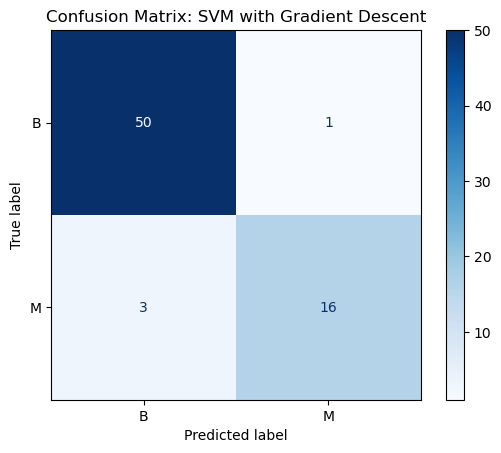

              precision    recall  f1-score   support

           B       0.94      0.98      0.96        51
           M       0.94      0.84      0.89        19

    accuracy                           0.94        70
   macro avg       0.94      0.91      0.93        70
weighted avg       0.94      0.94      0.94        70



In [17]:
# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Sensitivity (Recall): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix: SVM with Gradient Descent")
plt.show()

# Print a detailed classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
